In [0]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np

##Aim:  CIFAR 10 
https://arxiv.org/pdf/1605.07146.pdf

Techniques ON Cnn:

Dropout

Regularization

Batch Normalization

Data Augmentation






In [0]:
data = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = data.load_data()


170500096/170498071 [==============================] - 6s 0us/step


In [0]:
train_images.shape

(50000, 32, 32, 3)

In [0]:
test_images.shape

(10000, 32, 32, 3)

In [0]:
train_labels.shape
#Needs to be  one hot encoded for the loss funtion

(50000, 1)

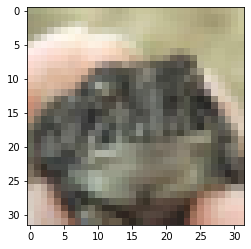

In [0]:
plt.imshow(train_images[25])

In [0]:
#Now we shall bring the image ito the range of 0-1
train_images = train_images/255
test_images = test_images/255

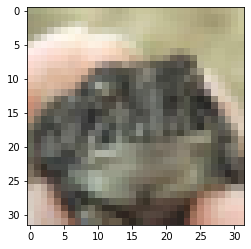

In [0]:
plt.imshow(train_images[25])

In [0]:
#For this exercise I will use 5000 train images and 1000 test images.

X_train = train_images
Y_train = train_labels

X_test = test_images
Y_test = test_labels

In [0]:
#We augment the data and add further train examples

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=110,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(X_train)

Using TensorFlow backend.


In [0]:
datagen
#We will later us datagen.flow() during training.

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
#one hot encofing of Labels
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test,10)

In [0]:
Y_train.shape

(50000, 10)

In [0]:
    from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
    from keras.layers import Conv2D, MaxPooling2D
    from keras import regularizers
    from keras.models import Sequential
    import keras


In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [0]:
def build_model(num_classes = 10 , weight_decay = 1e-2,):
    
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),input_shape = X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
 
       
   
    model.add(Flatten())
    model.add(Dense(num_classes,activation = 'softmax'))
    
    return model
    
    
    

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)
#As mentioned earlier

CIFAR_MODEL = build_model()

batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

CIFAR_MODEL.compile(loss = 'categorical_crossentropy' ,optimizer = opt , metrics = ['accuracy'])

history = CIFAR_MODEL.fit_generator(datagen.flow(X_train,Y_train , batch_size = batch_size), validation_data=(X_test,Y_test),epochs=75,verbose = 1,steps_per_epoch=X_train.shape[0] // batch_size)






Epoch 1/75
1562/1562 [==============================] - 33s 21ms/step - loss: 3.6309 - accuracy: 0.3916 - val_loss: 2.8193 - val_accuracy: 0.3804
Epoch 2/75
1562/1562 [==============================] - 32s 21ms/step - loss: 1.8604 - accuracy: 0.5299 - val_loss: 2.0107 - val_accuracy: 0.4861
Epoch 3/75
1562/1562 [==============================] - 32s 21ms/step - loss: 1.6334 - accuracy: 0.5873 - val_loss: 1.5959 - val_accuracy: 0.6000
Epoch 4/75
1562/1562 [==============================] - 32s 21ms/step - loss: 1.5613 - accuracy: 0.6098 - val_loss: 1.6640 - val_accuracy: 0.5992
Epoch 5/75
1562/1562 [==============================] - 32s 21ms/step - loss: 1.5164 - accuracy: 0.6229 - val_loss: 1.9879 - val_accuracy: 0.5166
Epoch 6/75
1562/1562 [==============================] - 32s 20ms/step - loss: 1.4842 - accuracy: 0.6269 - val_loss: 1.4703 - val_accuracy: 0.6394
Epoch 7/75
1562/1562 [==============================] - 32s 21ms/step - loss: 1.4363 - accuracy: 0.6385 - val_loss: 1.4959 -

In [0]:
#Learning curves

plt.plot(history.history['accuracy'])



In [0]:
model_json = CIFAR_MODEL.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')